In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
from keras.datasets import mnist
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train[0], y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = [['Accuracy']])
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7181 - Accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2815 - Accuracy: 0.9330
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1917 - Accuracy: 0.9480
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1628 - Accuracy: 0.9547
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1457 - Accuracy: 0.9590
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1297 - Accuracy: 0.9640
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1128 - Accuracy: 0.9691
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1064 - Accuracy: 0.9706
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1025 - Accuracy: 0.9725
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.093

In [ ]:
predictions = model.predict([X_test])
print(np.argmax(predictions[8]), y_test[8])

313/313 [==============================] - 1s 2ms/step
5 5


In [ ]:
for i in range(10):
  print(np.argmax(predictions[i]))

7
2
1
0
4
1
4
9
5
9


In [ ]:
for i in range(10):
  print(y_test[i])

7
2
1
0
4
1
4
9
5
9


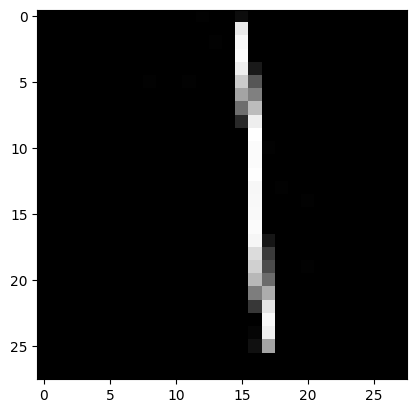

1/1 [==============================] - 0s 17ms/step
[[0.08901237 0.06723507 0.12462114 0.07480914 0.09772363 0.09335516
  0.07359838 0.07195035 0.19916227 0.10853249]]


In [ ]:
file = "/content/1.jpg"
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255

plt.imshow(image.reshape(28, 28), cmap="Greys")
plt.show()
pred = model.predict(image.reshape(1, 28, 28, 1), batch_size=1)

print(pred)